In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 64

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root = './data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


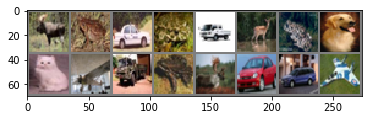

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5
    nping = img.numpy()
    nping = np.transpose(nping, (1, 2, 0))
    plt.imshow(nping)

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [3]:
import torch.nn as nn
import torch.nn.functional as tf

class MobileNet(nn.Module):
    def __init__(self):
        super(MobileNet,self).__init__()
        
        #标准卷积
        def conv_bn(inp,oup,stride):
            return nn.Sequential(
                    nn.Conv2d(inp,oup,3,stride,1,bias = False),
                    nn.BatchNorm2d(oup),
                    nn.ReLU(inplace = True))
        
        #深度卷积
        def conv_dw(inp,oup,stride):
            return nn.Sequential(
                    nn.Conv2d(inp,inp,3,stride,1,groups = inp,bias = False),
                    nn.BatchNorm2d(inp),
                    nn.ReLU(inplace = True),
                    
                    nn.Conv2d(inp,oup,1,1,0,bias = False),
                    nn.BatchNorm2d(oup),
                    nn.ReLU(inplace = True))
            
        #网络模型声明
        self.model = nn.Sequential(
                conv_bn(3,32,2),
                conv_dw(32,64,1),
                conv_dw(64,128,2),
                conv_dw(128,128,1),
                conv_dw(128,256,2),
                conv_dw(256,256,1),
                conv_dw(256,512,2),
                conv_dw(512,512,1),
                conv_dw(512,512,1),
                conv_dw(512,512,1),
                conv_dw(512,512,1),
                conv_dw(512,512,1),
                conv_dw(512,1024,2),
                conv_dw(1024,1024,1),
                nn.AvgPool2d(7),)
      
        self.fc = nn.Linear(1024,1000)
    
    #网络的前向过程    
    def forward(self,x):
        x = self.model(x)
        x = x.view(-1,1024)
        x = self.fc(x)
        return x
 
net = MobileNet()
print(net)

MobileNet(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace)
    )
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=64, bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=1e-2, momentum=0.9)

In [5]:
for epoch in range(2):
    for i, data in enumerate(trainloader):
        images, labels = data
        outputs = net(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if(i % 1000 == 0):
            print('Epoch: %d, Step: %d, Loss: %.3f' %(epoch, i, loss.item()))

Epoch: 0, Step: 0, Loss: 6.928


KeyboardInterrupt: 